## Library Import


In [66]:
import pandas as pd
import numpy as np

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',context='notebook')


In [68]:
Data = pd.read_csv('apartments_clean.csv', sep=',', encoding='latin-1')

In [69]:
Col=Data.columns.values
print(Col)

['bathrooms' 'bedrooms' 'price' 'square_feet' 'category_encoded'
 'amenities_encoded' 'has_photo_encoded' 'pets_allowed_encoded'
 'cityname_encoded' 'state_encoded' 'source_encoded']


In [70]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bathrooms             9998 non-null   int64
 1   bedrooms              9998 non-null   int64
 2   price                 9998 non-null   int64
 3   square_feet           9998 non-null   int64
 4   category_encoded      9998 non-null   int64
 5   amenities_encoded     9998 non-null   int64
 6   has_photo_encoded     9998 non-null   int64
 7   pets_allowed_encoded  9998 non-null   int64
 8   cityname_encoded      9998 non-null   int64
 9   state_encoded         9998 non-null   int64
 10  source_encoded        9998 non-null   int64
dtypes: int64(11)
memory usage: 859.3 KB


## Correlation Matrix

<Axes: >

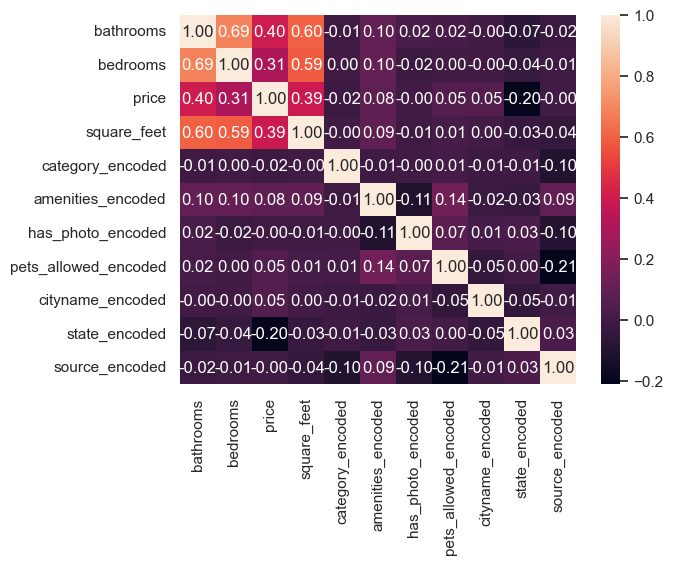

In [71]:
Cor=Data.corr()
sns.heatmap(Cor,cbar=True,annot=True,yticklabels=Col,xticklabels=Col,fmt=".2f")

In [72]:
Data.describe()

,bathrooms,bedrooms,price,square_feet,category_encoded,amenities_encoded,has_photo_encoded,pets_allowed_encoded,cityname_encoded,state_encoded,source_encoded
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.342168,1.743049,1486.391278,945.949690,0.000600,1700.215643,1.072515,1.796659,732.104721,26.619624,8.551910
std,0.584591,0.943057,1076.547225,655.747081,0.031622,610.406044,0.322605,1.044935,458.917652,15.457339,1.067988
min,0.000000,0.000000,200.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,949.000000,649.000000,0.000000,1451.250000,1.000000,1.000000,309.000000,12.000000,8.000000
50%,1.000000,2.000000,1270.000000,802.500000,0.000000,2071.500000,1.000000,1.000000,739.000000,27.000000,9.000000
75%,2.000000,2.000000,1695.000000,1100.000000,0.000000,2135.000000,1.000000,3.000000,1135.000000,43.000000,9.000000
max,8.000000,9.000000,52500.000000,40000.000000,2.000000,2253.000000,2.000000,3.000000,1573.000000,51.000000,11.000000


In [73]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Data_to_model=Data[['bathrooms','bedrooms','square_feet','price']]
Data_to_model.describe()

,bathrooms,bedrooms,square_feet,price
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.342168,1.743049,945.949690,1486.391278
std,0.584591,0.943057,655.747081,1076.547225
min,0.000000,0.000000,101.000000,200.000000
25%,1.000000,1.000000,649.000000,949.000000
50%,1.000000,2.000000,802.500000,1270.000000
75%,2.000000,2.000000,1100.000000,1695.000000
max,8.000000,9.000000,40000.000000,52500.000000


<Axes: >

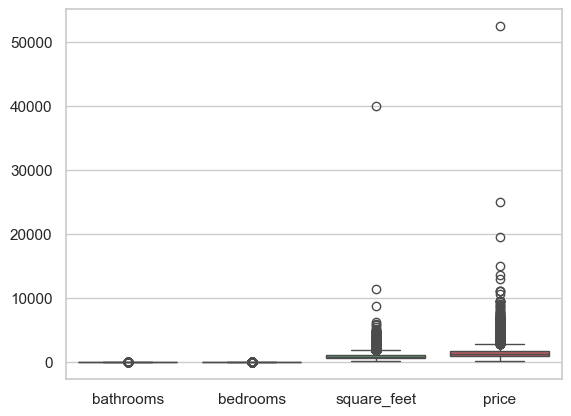

In [74]:
sns.boxplot(Data_to_model)

In [75]:
import pandas as pd


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers_iqr(Data_to_model, "price")
df_cleaned = remove_outliers_iqr(Data_to_model, "square_feet")

print(f"Datos después de eliminar outliers: {df_cleaned.shape}")


Datos después de eliminar outliers: (9376, 4)


In [76]:
df_cleaned.describe()

,bathrooms,bedrooms,square_feet,price
count,9376.000000,9376.000000,9376.000000,9376.000000
mean,1.266212,1.613908,843.692086,1399.264292
std,0.469841,0.786035,310.467464,905.043141
min,0.000000,0.000000,101.000000,200.000000
25%,1.000000,1.000000,635.000000,925.000000
50%,1.000000,1.000000,786.000000,1233.000000
75%,2.000000,2.000000,1026.000000,1627.250000
max,4.000000,6.000000,1776.000000,52500.000000


<Axes: >

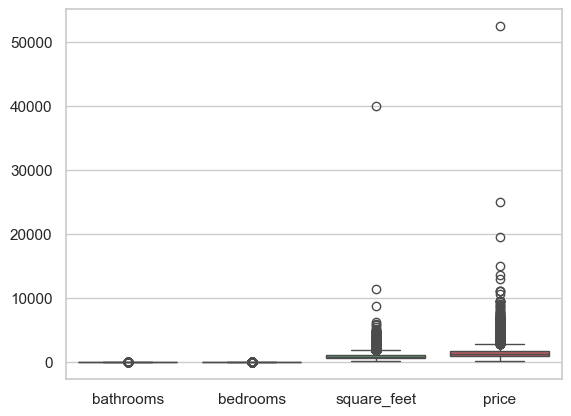

In [77]:
sns.boxplot(Data_to_model)

In [ ]:

df_cleaned[['bathrooms','bedrooms','square_feet','price']]=scaler.fit_transform(df_cleaned[['bathrooms','bedrooms','square_feet','price']])
sns.histplot(df_cleaned)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_12160\2947694334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['bathrooms','bedrooms','square_feet','price']]=scaler.fit_transform(df_cleaned[['bathrooms','bedrooms','square_feet','price']])


In [ ]:
df_cleaned.describe()

,bathrooms,bedrooms,square_feet,price
count,9376.000000,9376.000000,9376.000000,9376.000000
mean,0.266212,0.613908,0.147550,0.236759
std,0.469841,0.786035,0.794034,1.288776
min,-1.000000,-1.000000,-1.751918,-1.470986
25%,0.000000,0.000000,-0.386189,-0.438590
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.613811,0.561410
max,3.000000,5.000000,2.531969,73.003916


<Axes: >

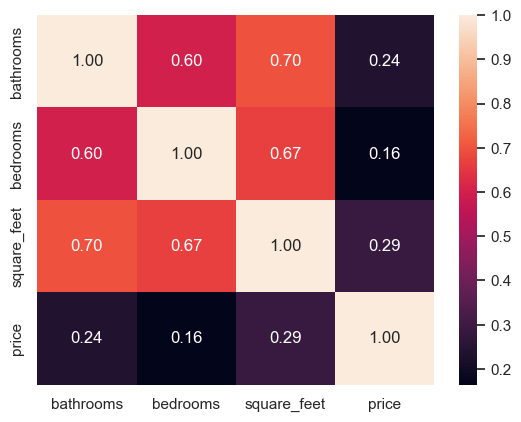

In [ ]:
Cor_mod=df_cleaned.corr()
sns.heatmap(Cor_mod,cbar=True,annot=True,yticklabels=Data_to_model.columns.values,xticklabels=Data_to_model.columns.values,fmt=".2f")

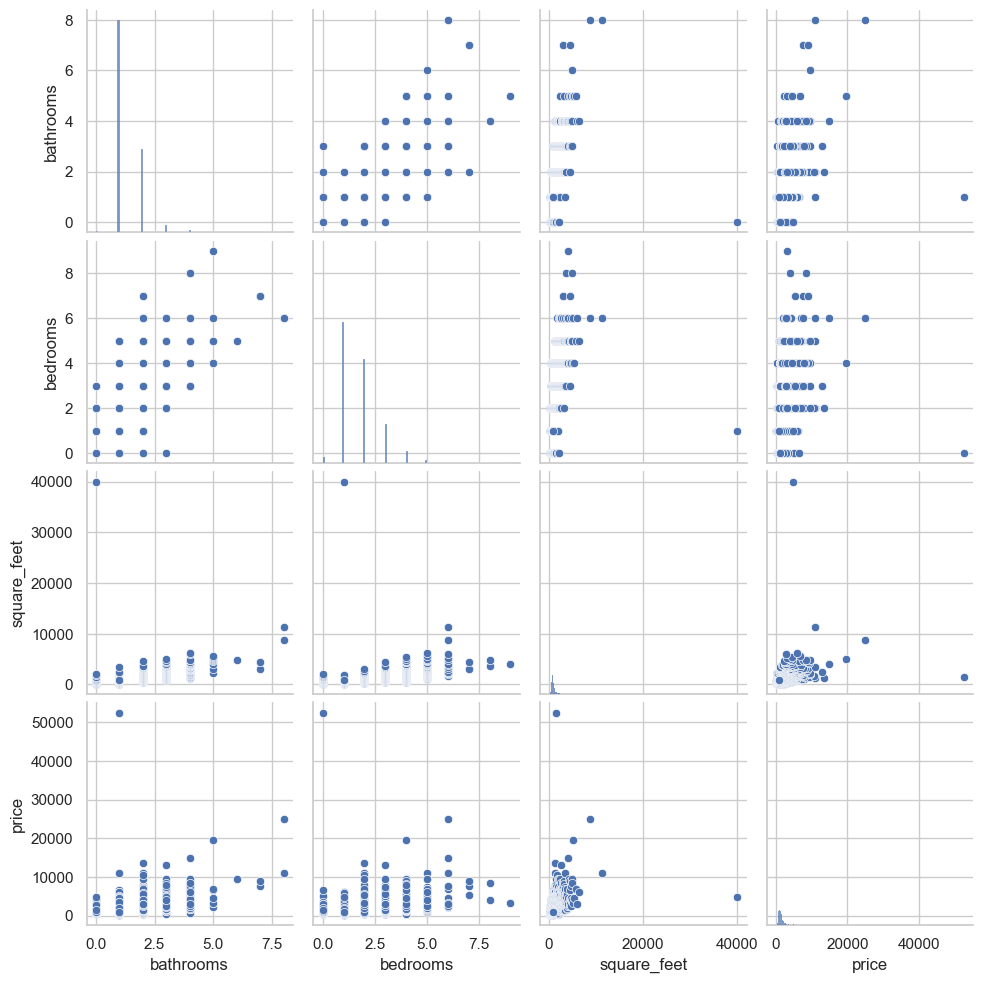

In [ ]:
sns.pairplot(Data_to_model[Data_to_model.columns.values])

## Implementation of model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [ ]:
Data_to_model['bathrooms']=StandardScaler().fit_transform(Data_to_model[['bathrooms']])

C:\Users\SANTI\AppData\Local\Temp\ipykernel_12160\1839853167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_to_model['bathrooms']=StandardScaler().fit_transform(Data_to_model[['bathrooms']])


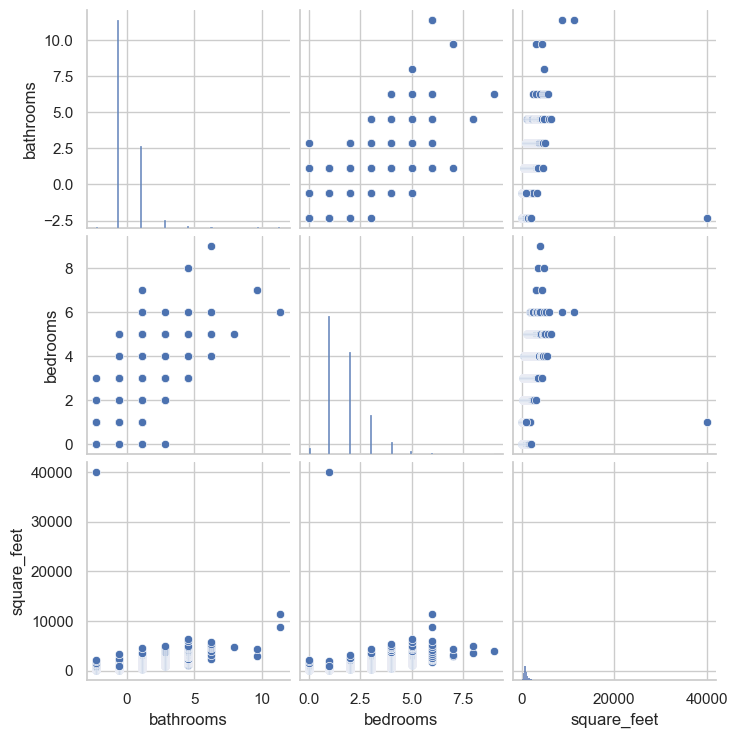

In [ ]:
sns.pairplot(Data_to_model[Data_to_model.columns.values])

In [ ]:
y = Data_to_model.pop('price')


In [ ]:
y.describe()

count     9998.000000
mean      1486.391278
std       1076.547225
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

In [ ]:
x = Data_to_model.copy()

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
Rd=RandomForestRegressor()
#lr=LinearRegression()
Mod=Rd.fit(X_train,Y_train)

In [ ]:
80*0.009

0.72

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = Mod.predict(X_test)

# Métricas de regresión
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 507.8655407118091
MSE: 579989.8318961693
RMSE: 761.5706348699176
R² Score: 0.16985406266638758


d:\Conda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


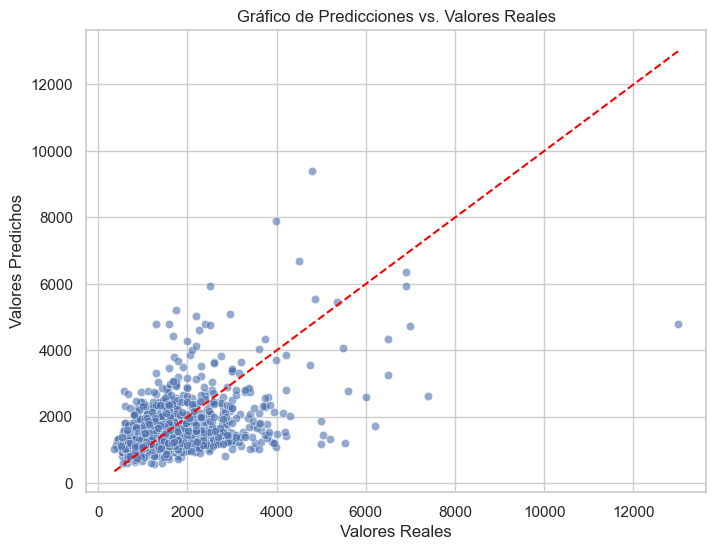

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)  # Puntos dispersos
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Línea ideal

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicciones vs. Valores Reales")
plt.show()
